This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [2]:
#vids = 2
to_track = []
frames = 651
fps = 100.02
umppx = 0.07

folder = '10_04_18_COOH_PEG_serum' #Folder in AWS S3 containing files to be analyzed
bucket = 'rhodese.data'
vids = 10
types = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

for typ in types:
    for num in range(1, vids+1):
        #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
        to_track.append('{}_XY{}'.format(typ, '%02d' % num))

In [ ]:
to_track[5:10] + to_track[30:35]

In [3]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
    #                                                         remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with COOH_XY01
Done with COOH_XY02
Done with COOH_XY03
Done with COOH_XY04
Done with COOH_XY05
Done with COOH_XY06
Done with COOH_XY07
Done with COOH_XY08
Done with COOH_XY09
Done with COOH_XY10
Done with COOH_serum_XY01
Done with COOH_serum_XY02
Done with COOH_serum_XY03
Done with COOH_serum_XY04
Done with COOH_serum_XY05
Done with COOH_serum_XY06
Done with COOH_serum_XY07
Done with COOH_serum_XY08
Done with COOH_serum_XY09
Done with COOH_serum_XY10
Done with PEG_XY01
Done with PEG_XY02
Done with PEG_XY03
Done with PEG_XY04
Done with PEG_XY05
Done with PEG_XY06
Done with PEG_XY07
Done with PEG_XY08
Done with PEG_XY09
Done with PEG_XY10
Done with PEG_serum_XY01
Done with PEG_serum_XY02
Done with PEG_serum_XY03
Done with PEG_serum_XY04
Done with PEG_serum_XY05
Done with PEG_serum_XY06
Done with PEG_serum_XY07
Done with PEG_serum_XY08
Done with PEG_serum_XY09
Done with PEG_serum_XY10


In [10]:
exps = []
geodata = {}
for typ in types:
    to_avg = []
    for sample in to_track:
        combi = '{}_X'.format(typ)
        if combi in sample:
            to_avg.append(sample)

    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata[typ] = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment=typ)
    exps.append(typ)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


In [11]:
#exps = []
typ = 'COOH_serum'
to_avg = []
for sample in to_track:
    combi = '{}_X'.format(typ)
    if combi in sample and '08' not in sample:
        to_avg.append(sample)

weights, wh1 = msd.precision_weight(to_avg, gSEM)
geodata[typ] = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                  bucket=bucket, folder=folder, experiment=typ)
#exps.append(typ)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


In [27]:
exps = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

In [21]:
geodata['COOH'].geomean[100]

1.0821017733396794

In [26]:
for typ in exps:
    print('{}: {}  (95% CI: {} - {}) um2/s'.format(typ, np.exp(geodata[typ].geomean[100])/4,
                                                   np.exp(geodata[typ].geomean[100] - geodata[typ].geostd[100])/4,
                                                   np.exp(geodata[typ].geomean[100] + geodata[typ].geostd[100])/4))
    #print('{}: '.format(typ))

COOH: 0.7377187771469876  (95% CI: 0.7292854542695363 - 0.7462496214193044) um2/s
COOH_serum: 1.0654243271888328  (95% CI: 1.0615359951318437 - 1.0693269019340161) um2/s
PEG: 0.925457546450162  (95% CI: 0.9154233197808423 - 0.9356017612557631) um2/s
PEG_serum: 1.7815289615756522  (95% CI: 1.776563542418997 - 1.7865082588665888) um2/s


Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

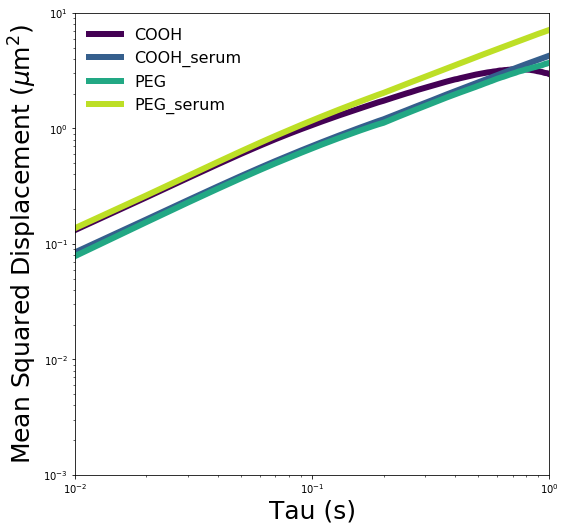

In [12]:
msd.plot_all_experiments(exps,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

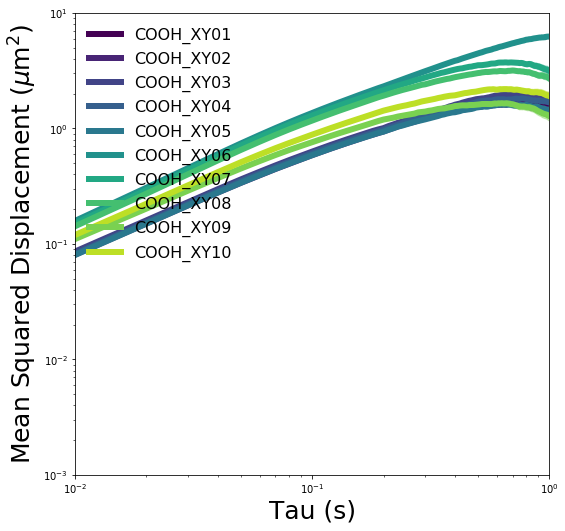

In [3]:
msd.plot_all_experiments(to_track[0:10], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

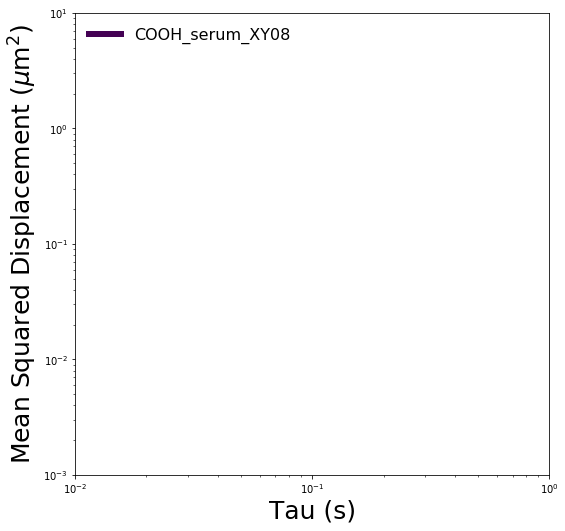

In [22]:
msd.plot_all_experiments(to_track[17:18], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

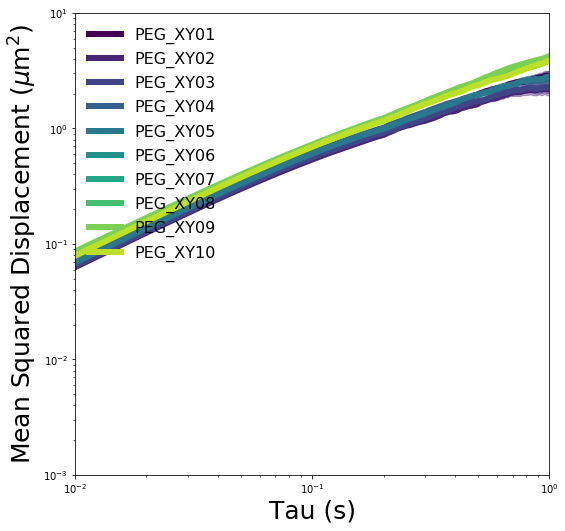

In [5]:
msd.plot_all_experiments(to_track[20:30], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

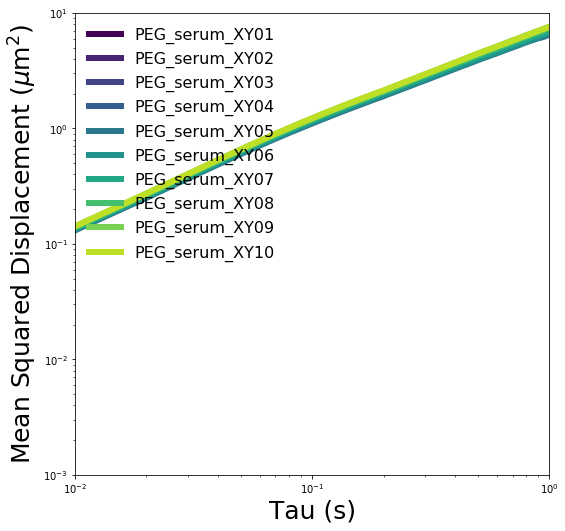

In [3]:
msd.plot_all_experiments(to_track[30:40], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)